In [1]:
!wget -O "./GSE111933_Matrix_Avg_Beta.txt.gz" "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE111933&format=file&file=GSE111933%5FMatrix%5FAvg%5FBeta%2Etxt%2Egz"


--2019-10-13 22:15:51--  https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE111933&format=file&file=GSE111933%5FMatrix%5FAvg%5FBeta%2Etxt%2Egz
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)... 130.14.29.110, 2607:f220:41e:4290::110
Connecting to www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)|130.14.29.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193809465 (185M) [application/octet-stream]
Saving to: ‘./GSE111933_Matrix_Avg_Beta.txt.gz’

./GSE111933_Matrix_ 100%[===================>] 184.83M  5.19MB/s    in 26s     

2019-10-13 22:16:18 (6.98 MB/s) - ‘./GSE111933_Matrix_Avg_Beta.txt.gz’ saved [193809465/193809465]



In [2]:
!gzip -d "./GSE111933_Matrix_Avg_Beta.txt.gz"

gzip: ./GSE111933_Matrix_Avg_Beta.txt already exists; do you wish to overwrite (y or n)? ^C


In [5]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt # NOTE: This was tested with matplotlib v. 2.1.0


In [6]:
data = pd.read_csv("./GSE111933_Matrix_Avg_Beta.txt", sep='\t', low_memory=False)
data.set_index("ID_REF", inplace = True) 
data = data[data.columns[::2]]

data = data.replace(r'^\s*$', 0, regex=True) # might be a bad idea to set to 0

data[data.columns] = data[data.columns].astype(float)


 
print(data.head())
print(data.shape)


               U909N     U912N     U913N     U915N     U916N     U917N  \
ID_REF                                                                   
cg00000029  0.275748  0.285988  0.504508  0.348245  0.416986  0.436067   
cg00000108  0.921596  0.939222  0.928610  0.919069  0.937614  0.953862   
cg00000109  0.799066  0.857993  0.832321  0.819187  0.860120  0.864267   
cg00000165  0.157332  0.211416  0.144390  0.168022  0.174621  0.169145   
cg00000236  0.752568  0.816236  0.847976  0.814823  0.842974  0.855966   

               U918N     U920N    U921N1     U922N  ...     U087T     U088T  \
ID_REF                                              ...                       
cg00000029  0.280108  0.463898  0.418172  0.479355  ...  0.138168  0.127061   
cg00000108  0.904358  0.923383  0.934689  0.926050  ...  0.916238  0.906655   
cg00000109  0.877577  0.795923  0.841781  0.858538  ...  0.897681  0.899598   
cg00000165  0.158379  0.195774  0.186340  0.187780  ...  0.657997  0.680868   
cg00000

In [ ]:
print(data.head())


In [7]:

# First center and scale the data
scaled_data = preprocessing.scale(data.T)
#  



In [8]:
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data


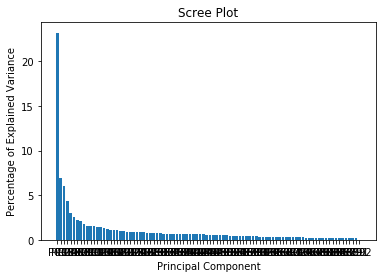

In [9]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
#  
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


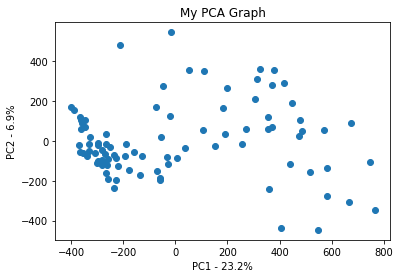

In [10]:
pca_df = pd.DataFrame(pca_data, index=[data.columns], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
# for sample in pca_df.index:
#     plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()


In [69]:
def colors(headers):
    r = []
    for head in headers:
        if "N" in head:
            r.append('r')
        else:
            r.append('b')
    return r

def colors_from_age(ages):
    colors = ages - ages.min()
    colors *= (1/colors.max())
    return colors.to_numpy()
            
cols = colors_from_age(annotations["age"])
print(cols)

[0.6   0.85  0.175 0.45  0.375 0.9   0.425 0.7   0.95  0.475 0.4   0.175
 0.825 0.4   0.725 0.925 0.825 0.6   0.85  0.725 0.325 0.35  0.3   0.3
 0.45  0.75  0.575 0.525 1.    0.75  0.    0.675 0.575 0.55  0.7   0.1
 0.825 0.475 0.7   0.975 0.7   0.375 0.35  0.65  0.175 0.7   0.6   0.85
 0.175 0.45  0.375 0.9   0.425 0.7   0.95  0.475 0.4   0.175 0.825 0.4
 0.725 0.925 0.825 0.6   0.85  0.725 0.325 0.35  0.3   0.3   0.45  0.75
 0.575 0.525 1.    0.75  0.    0.675 0.575 0.55  0.7   0.1   0.825 0.475
 0.7   0.975 0.7   0.375 0.35  0.65  0.175 0.7  ]


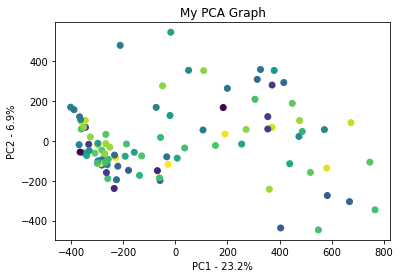

In [70]:
pca_df = pd.DataFrame(pca_data, index=[data.columns], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2, c=cols)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
# for sample in pca_df.index:
#     plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

In [20]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(np.array([pca_df.PC1, pca_df.PC2]).T, cols)


SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [21]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


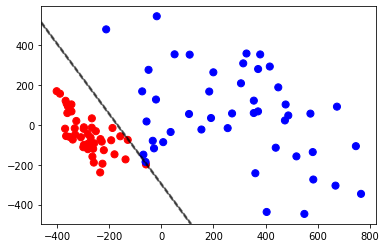

In [22]:
plt.scatter(pca_df.PC1, pca_df.PC2, c=cols, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [37]:
annotations = pd.read_csv("series.csv")
annotations.set_index("Sample_title", inplace=True)
annotations = annotations.T
for i, age in enumerate(annotations["age"]):
    annotations["age"][i] = age[4:]



In [53]:
annotations["age"] = annotations["age"].astype(float)

In [54]:
print(annotations["age"].head())

genomic DNA_N_909    69.0
genomic DNA_N_912    79.0
genomic DNA_N_913    52.0
genomic DNA_N_915    63.0
genomic DNA_N_916    60.0
Name: age, dtype: float64


In [72]:
print(data.head())

               U909N     U912N     U913N     U915N     U916N     U917N  \
ID_REF                                                                   
cg00000029  0.275748  0.285988  0.504508  0.348245  0.416986  0.436067   
cg00000108  0.921596  0.939222  0.928610  0.919069  0.937614  0.953862   
cg00000109  0.799066  0.857993  0.832321  0.819187  0.860120  0.864267   
cg00000165  0.157332  0.211416  0.144390  0.168022  0.174621  0.169145   
cg00000236  0.752568  0.816236  0.847976  0.814823  0.842974  0.855966   

               U918N     U920N    U921N1     U922N  ...     U087T     U088T  \
ID_REF                                              ...                       
cg00000029  0.280108  0.463898  0.418172  0.479355  ...  0.138168  0.127061   
cg00000108  0.904358  0.923383  0.934689  0.926050  ...  0.916238  0.906655   
cg00000109  0.877577  0.795923  0.841781  0.858538  ...  0.897681  0.899598   
cg00000165  0.158379  0.195774  0.186340  0.187780  ...  0.657997  0.680868   
cg00000